In [47]:
import pandas as pd
df= pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [48]:
import pandas as pd
lst=['Hello','For','Hello','is',
     'portal','for','Hello']
df=pd.DataFrame(lst)
print(df)

        0
0   Hello
1     For
2   Hello
3      is
4  portal
5     for
6   Hello


In [49]:
import numpy as np
import pandas as pd
data=np.array([[1,2,3],[4,5,6],[7,8,9]])
df=pd.DataFrame(data,columns=['A','B','C'])
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


In [50]:
import pandas as pd
dict = {'name':["aparna", "pankaj", "sudhir", "Geeku"],
      'degree': ["MCA", "BCA", "M.Tech", "MCA"],
      'score':[90, 40, 80, 98]}
df= pd.DataFrame(dict)
print(df)

     name  degree  score
0  aparna     MCA     90
1  pankaj     BCA     40
2  sudhir  M.Tech     80
3   Geeku     MCA     98


In [51]:
import pandas as pd
data = {'Name': ['John', 'Alice', 'Bob', 'Eve', 'Charlie'],
    'Age': [25, 30, 22, 35, 28],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Salary': [50000, 55000, 40000, 70000, 48000]}
df= pd.DataFrame(data)
print(df.index)  # Accessing the index

RangeIndex(start=0, stop=5, step=1)


In [52]:
# Set 'Name' column as the index
df_with_index= df.set_index('Name')
print(df_with_index)

         Age  Gender  Salary
Name                        
John      25    Male   50000
Alice     30  Female   55000
Bob       22    Male   40000
Eve       35  Female   70000
Charlie   28    Male   48000


In [53]:
# Reset the index back to the default integer index
df_reset= df.reset_index()
print(df_reset)

   index     Name  Age  Gender  Salary
0      0     John   25    Male   50000
1      1    Alice   30  Female   55000
2      2      Bob   22    Male   40000
3      3      Eve   35  Female   70000
4      4  Charlie   28    Male   48000


In [54]:
df_row = df.loc['Alice']
print(df_row)

KeyError: 'Alice'

In [55]:
# Set 'Age' as the new index
df_with_new_index= df.set_index('Age')
print(df_with_new_index)

        Name  Gender  Salary
Age                         
25      John    Male   50000
30     Alice  Female   55000
22       Bob    Male   40000
35       Eve  Female   70000
28   Charlie    Male   48000


In [56]:
import pandas as pd
data = {'Name': ['John', 'Alice', 'Bob', 'Eve', 'Charlie'],
    'Age': [25, 30, 22, 35, 28],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Salary': [50000, 55000, 40000, 70000, 48000]}
df= pd.DataFrame(data) # Display the entire DataFrame
print(df)

      Name  Age  Gender  Salary
0     John   25    Male   50000
1    Alice   30  Female   55000
2      Bob   22    Male   40000
3      Eve   35  Female   70000
4  Charlie   28    Male   48000


In [57]:
# Access the 'Age' column
age_column= df['Age']
print(age_column)

0    25
1    30
2    22
3    35
4    28
Name: Age, dtype: int64


In [58]:
#Accesstherowatindex1(secondrow)
second_row=df.iloc[1]
print(second_row)

Name       Alice
Age           30
Gender    Female
Salary     55000
Name: 1, dtype: object


In [59]:
# Access the first three rows and the 'Name' and 'Age' columns
subset = df.loc[0:2, ['Name', 'Age']]
print(subset)

    Name  Age
0   John   25
1  Alice   30
2    Bob   22


In [37]:
# Access rows where 'Age' is greater than 25
filtered_data= df[df['Age'] > 25]
print(filtered_data)

      Name  Age  Gender  Salary
1    Alice   30  Female   55000
3      Eve   35  Female   70000
4  Charlie   28    Male   48000


In [38]:
# Access the 'Salary' of the row with label 2
salary_at_index_2 = df.at[2, 'Salary']
print(salary_at_index_2)

40000


In [39]:
import pandas as pd
player_list= [['M.S.Dhoni', 36, 75, 5428000],
  ['A.B.D Villers', 38, 74, 3428000],
  ['V.Kohli', 31, 70, 8428000],
  ['S.Smith', 34, 80, 4428000],
  ['C.Gayle', 40, 100, 4528000],
  ['J.Root', 33, 72, 7028000],
  ['K.Peterson', 42, 85, 2528000]]
df= pd.DataFrame(player_list, columns=['Name', 'Age', 'Weight', 'Salary'])
print(df)

            Name  Age  Weight   Salary
0      M.S.Dhoni   36      75  5428000
1  A.B.D Villers   38      74  3428000
2        V.Kohli   31      70  8428000
3        S.Smith   34      80  4428000
4        C.Gayle   40     100  4528000
5         J.Root   33      72  7028000
6     K.Peterson   42      85  2528000


In [40]:
df1 = df.iloc[0:4]
print(df1)

            Name  Age  Weight   Salary
0      M.S.Dhoni   36      75  5428000
1  A.B.D Villers   38      74  3428000
2        V.Kohli   31      70  8428000
3        S.Smith   34      80  4428000


In [41]:
df1 = df.iloc[:, 0:2]
print(df1)

            Name  Age
0      M.S.Dhoni   36
1  A.B.D Villers   38
2        V.Kohli   31
3        S.Smith   34
4        C.Gayle   40
5         J.Root   33
6     K.Peterson   42


In [42]:
value = df.iloc[2, 3]
print("Specific Cell Value:", value)

Specific Cell Value: 8428000


In [43]:
data = df[df['Age'] > 35].iloc[:, :]
print("\nFilteredData based on Age > 35:\n", data)


FilteredData based on Age > 35:
             Name  Age  Weight   Salary
0      M.S.Dhoni   36      75  5428000
1  A.B.D Villers   38      74  3428000
4        C.Gayle   40     100  4528000
6     K.Peterson   42      85  2528000


In [44]:
df.set_index('Name', inplace=True)
custom = df.loc['A.B.D Villers':'S.Smith']
print(custom)

               Age  Weight   Salary
Name                               
A.B.D Villers   38      74  3428000
V.Kohli         31      70  8428000
S.Smith         34      80  4428000


In [45]:
value = df.loc['V.Kohli', 'Salary']
print("\nValueof the Specific Cell (V.Kohli, Salary):", value)


Valueof the Specific Cell (V.Kohli, Salary): 8428000


In [60]:
import pandas as pd
# reading csv file
df = pd.read_csv("people_data.csv")
df

,First Name,Last Name,Sex,Email,Date of birth,Job Title,Unnamed: 6
0,Shelby,Terrell,Male,elijah57@example.net,26-10-1945,Games developer,NaN
1,Phillip,Summers,Female,bethany14@example.com,24-03-1910,Phytotherapist,NaN
2,Kristine,Travis,Male,bthompson@example.com,02-07-1992,Homeopath,NaN
3,Yesenia,Martinez,Male,kaitlinkaiser@example.com,03-08-2017,Market researcher,NaN
4,Lori,Todd,Male,buchananmanuel@example.net,01-12-1938,Veterinary surgeon,NaN


In [61]:
df = pd.read_csv("people_data.csv", usecols=["First Name", "Email"])
print(df)

  First Name                       Email
0     Shelby        elijah57@example.net
1    Phillip       bethany14@example.com
2   Kristine       bthompson@example.com
3    Yesenia   kaitlinkaiser@example.com
4       Lori  buchananmanuel@example.net


In [62]:
df = pd.read_csv("people_data.csv", index_col="First Name")
print(df)

           Last Name     Sex                       Email Date of birth  \
First Name                                                               
Shelby       Terrell    Male        elijah57@example.net    26-10-1945   
Phillip      Summers  Female       bethany14@example.com    24-03-1910   
Kristine      Travis    Male       bthompson@example.com    02-07-1992   
Yesenia     Martinez    Male   kaitlinkaiser@example.com    03-08-2017   
Lori            Todd    Male  buchananmanuel@example.net    01-12-1938   

                     Job Title  Unnamed: 6  
First Name                                  
Shelby         Games developer         NaN  
Phillip         Phytotherapist         NaN  
Kristine             Homeopath         NaN  
Yesenia      Market researcher         NaN  
Lori        Veterinary surgeon         NaN  


In [64]:
df = pd.read_csv("people_data.csv", na_values=["N/A", "Unknown"])

In [72]:
import pandas as pd
# Sample data stored in a multi-line string
data = """totalbill_tip, sex:smoker, day_time, size
16.99, 1.01:Female|No, Sun, Dinner, 2
10.34, 1.66, Male, No|Sun:Dinner, 3
21.01:3.5_Male, No:Sun, Dinner, 3
23.68, 3.31, Male|No, Sun_Dinner, 2
24.59:3.61, Female_No, Sun, Dinner, 4
25.29, 4.71|Male, No:Sun, Dinner, 4"""
# Save the data to a CSV file
with open("sample.csv", "w") as file:
  file.write(data)
print(data)

totalbill_tip, sex:smoker, day_time, size 
16.99, 1.01:Female|No, Sun, Dinner, 2 
10.34, 1.66, Male, No|Sun:Dinner, 3 
21.01:3.5_Male, No:Sun, Dinner, 3 
23.68, 3.31, Male|No, Sun_Dinner, 2 
24.59:3.61, Female_No, Sun, Dinner, 4 
25.29, 4.71|Male, No:Sun, Dinner, 4


In [73]:
# Load the CSV file using pandas with multiple delimiters
df = pd.read_csv('sample.csv',
        sep='[:, |_]',  # Define the delimiters
        engine='python')  # Use Python engine for regex separators
df

,totalbill,tip,Unnamed: 2,sex,smoker,Unnamed: 5,day,time,Unnamed: 8,size
16.99,NaN,1.01,Female,No,NaN,Sun,NaN,Dinner,NaN,2.0
10.34,NaN,1.66,NaN,Male,NaN,No,Sun,Dinner,NaN,3.0
21.01,3.50,Male,NaN,No,Sun,NaN,Dinner,NaN,3.0,NaN
23.68,NaN,3.31,NaN,Male,No,NaN,Sun,Dinner,NaN,2.0
24.59,3.61,NaN,Female,No,NaN,Sun,NaN,Dinner,NaN,4.0
25.29,NaN,4.71,Male,NaN,No,Sun,NaN,Dinner,NaN,4.0


In [74]:
df = pd.read_csv('people_data.csv', nrows=3)
df

,First Name,Last Name,Sex,Email,Date of birth,Job Title,Unnamed: 6
0,Shelby,Terrell,Male,elijah57@example.net,26-10-1945,Games developer,NaN
1,Phillip,Summers,Female,bethany14@example.com,24-03-1910,Phytotherapist,NaN
2,Kristine,Travis,Male,bthompson@example.com,02-07-1992,Homeopath,NaN


In [75]:
df= pd.read_csv("people_data.csv")
print("Previous Dataset: ")
print(df)
# using skiprows
df = pd.read_csv("people_data.csv", skiprows = [4,5])
print("Dataset After skipping rows: ")
print(df)

Previous Dataset: 
  First Name Last Name     Sex                       Email Date of birth  \
0     Shelby   Terrell    Male        elijah57@example.net    26-10-1945   
1    Phillip   Summers  Female       bethany14@example.com    24-03-1910   
2   Kristine    Travis    Male       bthompson@example.com    02-07-1992   
3    Yesenia  Martinez    Male   kaitlinkaiser@example.com    03-08-2017   
4       Lori      Todd    Male  buchananmanuel@example.net    01-12-1938   

            Job Title  Unnamed: 6  
0     Games developer         NaN  
1      Phytotherapist         NaN  
2           Homeopath         NaN  
3   Market researcher         NaN  
4  Veterinary surgeon         NaN  
Dataset After skipping rows: 
  First Name Last Name     Sex                  Email Date of birth  \
0     Shelby   Terrell    Male   elijah57@example.net    26-10-1945   
1    Phillip   Summers  Female  bethany14@example.com    24-03-1910   
2   Kristine    Travis    Male  bthompson@example.com    02-07-19

In [76]:
df = pd.read_csv("people_data.csv", parse_dates=["Date of birth"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   First Name     5 non-null      object        
 1   Last Name      5 non-null      object        
 2   Sex            5 non-null      object        
 3   Email          5 non-null      object        
 4   Date of birth  5 non-null      datetime64[ns]
 5   Job Title      5 non-null      object        
 6   Unnamed: 6     0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 412.0+ bytes
None


/tmp/ipython-input-1597538332.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("people_data.csv", parse_dates=["Date of birth"])


In [77]:
url = "https://website.org/wpcontent/uploads/20241121154629307916/people_data.csv"
df = pd.read_csv(url)
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 4


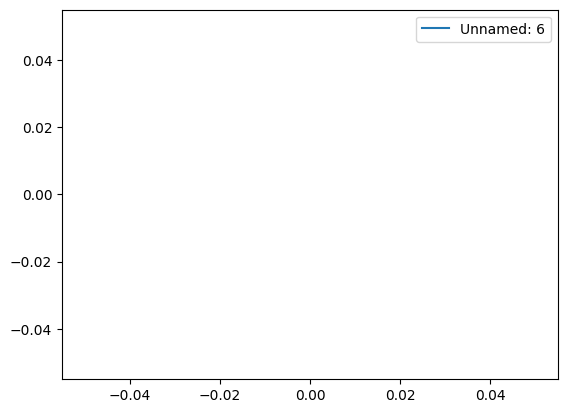

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('people_data.csv')
df.plot()
plt.show()